<a href="https://colab.research.google.com/github/Mrju10/wevelet-python/blob/main/wevelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pywavelets


`

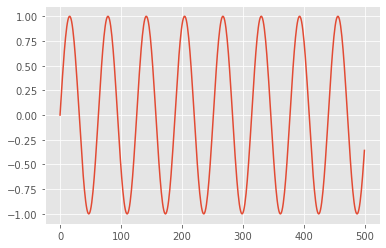

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import signal

#crear senial
x = np.sin(np.arange(0,50,.1))
plt.plot(x)
plt.show()



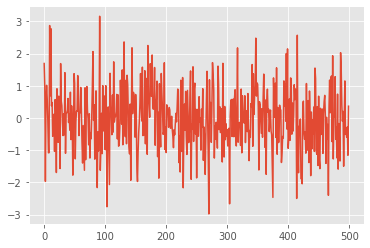

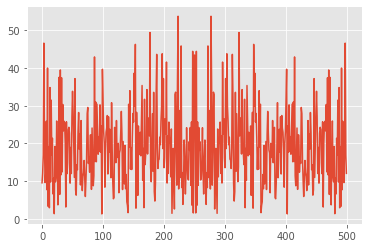

In [ ]:
#generar ruido
ruido = np.random.normal(0,1,len(x))
plt.plot(ruido)
plt.show()
plt.plot(np.abs(np.fft.fft(ruido)))
plt.show()


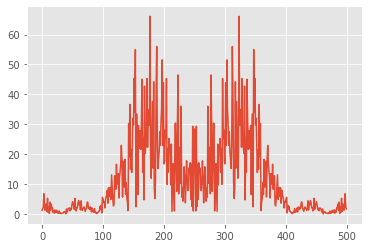

In [ ]:
#colorear el ruido
ruido= signal.lfilter([0.184,-0.067,-0.319,0.548,-0.319,-0.067,0.184], 1, ruido)
plt.plot(np.abs(np.fft.fft(ruido)))
plt.show()


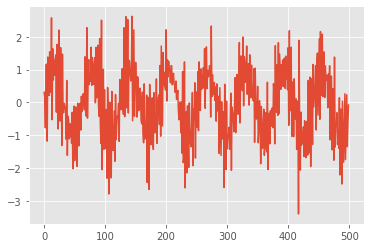

In [ ]:
#senial con ruido
sr=x+ruido
plt.plot(sr)
plt.show()


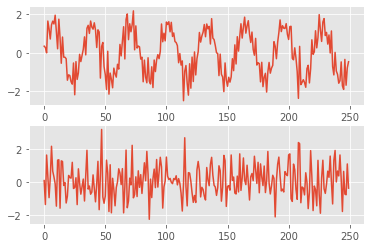

In [ ]:
#obtener la wevelet
cA, cD=  pywt.dwt(sr, 'db1')
plt.subplot(2,1,1)
plt.plot(cA)

plt.subplot(2,1,2)
plt.plot(cD)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9d4ac31b50>,
 [<matplotlib.lines.Line2D at 0x7f9d4ab9d6d0>])

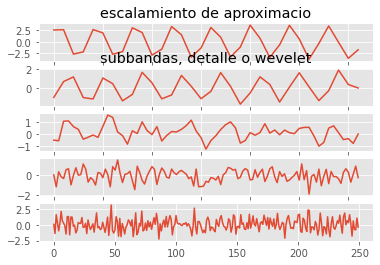

In [ ]:
#obtener la wevelet
cA1, cD1,cD2,cD3,cD4=  pywt.wavedec(sr, 'db1', level=4 )
plt.subplot(5,1,1), plt.plot(cA1), plt.title('escalamiento de aproximacio')
plt.subplot(5,1,2), plt.plot(cD1), plt.title('subbandas, detalle o wevelet')
plt.subplot(5,1,3), plt.plot(cD2)
plt.subplot(5,1,4), plt.plot(cD3)
plt.subplot(5,1,5), plt.plot(cD4)

[ 1.01057706e-01 -1.35474944e+00  1.65517016e+00  3.09526136e-01
 -9.37725347e-01  2.76480723e-01  2.18898956e+00  6.74721513e-01
  3.27101986e-01 -9.61815803e-02 -1.45385047e+00  1.34290859e+00
  1.37010000e+00 -1.57868358e+00  1.30092143e+00  1.26398697e+00
 -1.96501907e-01 -2.04589952e-02 -1.26272468e+00 -8.44195640e-01
  4.14331677e-01  2.84609611e-01  2.51304991e-01  1.21224915e+00
 -3.79146830e-01 -3.14632295e-01  2.72904992e-01 -1.36116679e+00
  8.17149492e-01 -5.58604253e-02 -7.26316674e-01 -2.54055309e-01
  1.93902106e-01 -1.14150140e+00  4.68031300e-01  1.94431613e+00
 -4.17423295e-01 -2.30004979e-01 -7.29894314e-01 -5.95856364e-01
  4.48481023e-01 -3.69246554e-01 -1.19114569e+00 -7.36875707e-02
  1.27278411e+00 -1.66947631e+00  4.40597729e-01  3.21226464e+00
 -8.97115562e-01 -1.27912525e+00 -8.38870461e-01  1.34414378e+00
  5.68438913e-01 -1.78148467e+00  1.06474745e+00 -1.85913256e+00
  2.41072625e-01 -4.36315535e-01 -1.43400814e+00 -3.25383207e-01
  2.27026492e-02  8.18141

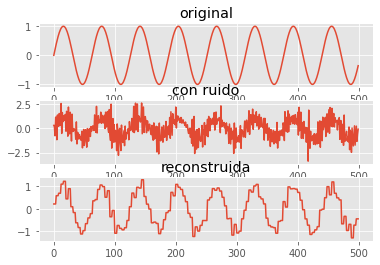

In [ ]:

print(cD4)

cD4 = np.zeros_like(cD4, int)
print(cD4)
cD3= np.zeros_like(cD3, int)
print(cD3)

sDesenoided=pywt.waverec([cA1,cD1,cD2,cD3,cD4],'db1')

plt.subplot(3,1,1), plt.plot(x), plt.title('original')
plt.subplot(3,1,2), plt.plot(sr), plt.title('con ruido')
plt.subplot(3,1,3), plt.plot(sDesenoided), plt.title('reconstruida')
plt.show()